In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
from function import *
from datetime import datetime
import pickle
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
aisles = pd.read_csv("C:/Dataset/aisles.csv")
departments = pd.read_csv("C:\Dataset\departments.csv")
order_products_prior = pd.read_csv("C:\Dataset\order_products__prior.csv")
order_products_train = pd.read_csv("C:\Dataset\order_products__train.csv")
orders = pd.read_csv("C:\Dataset\orders.csv")
products = pd.read_csv("C:\Dataset\products.csv")

In [2]:
aisles.isna().sum()

NameError: name 'aisles' is not defined

In [3]:
departments.isna().sum()

NameError: name 'departments' is not defined

In [4]:
products.isna().sum()

NameError: name 'products' is not defined

In [5]:
orders.isna().sum()

NameError: name 'orders' is not defined

In [7]:
orders.days_since_prior_order.value_counts()

30.0    5537
7.0     4628
6.0     3370
4.0     3260
3.0     3168
5.0     3100
2.0     2860
8.0     2642
1.0     2045
9.0     1732
14.0    1484
10.0    1385
13.0    1159
11.0    1155
12.0    1141
15.0     952
0.0      909
16.0     721
21.0     702
17.0     596
20.0     558
18.0     548
19.0     525
22.0     506
28.0     372
23.0     364
25.0     342
27.0     302
26.0     285
24.0     274
29.0     271
Name: days_since_prior_order, dtype: int64

In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
order_products_train.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [10]:
order_products_prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [11]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
print(len(products))
print(products.aisle_id.nunique())
print(products.department_id.nunique())

49688
134
21


In [13]:
products_aisles = pd.merge(products, aisles, on = 'aisle_id', how = 'left')
products_desc = pd.merge(products_aisles, departments, on = 'department_id', how = 'left')
products_desc.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


Text(0.5, 0, 'Department')

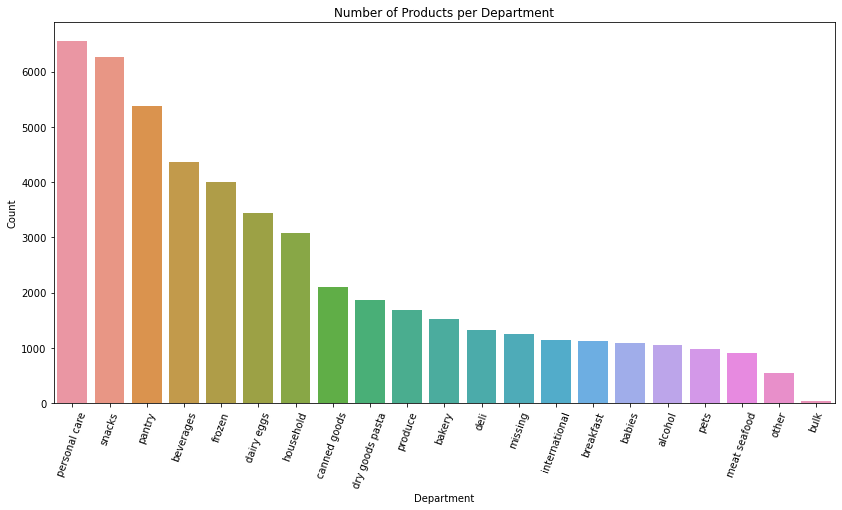

In [14]:
plt.figure(figsize = (14,7))
sns.countplot(x='department', data= products_desc, order = products_desc.department.value_counts().index)
plt.title('Number of Products per Department')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Department')


In [15]:
products_desc[products_desc['aisle']=='missing']

,product_id,product_name,aisle_id,department_id,aisle,department
37,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
71,72,Organic Honeycrisp Apples,100,21,missing,missing
109,110,Uncured Turkey Bologna,100,21,missing,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21,missing,missing
49574,49575,Chocolate Vanilla Malt Custard,100,21,missing,missing
49640,49641,"8\"" Pecan Pie",100,21,missing,missing
49663,49664,Lemon Cayenne Drinking Vinegar,100,21,missing,missing


In [16]:
products_desc[products_desc['department']=='snacks']

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
15,16,Mint Chocolate Flavored Syrup,103,19,ice cream toppings,snacks
24,25,Salted Caramel Lean Protein & Fiber Bar,3,19,energy granola bars,snacks
31,32,Nacho Cheese White Bean Chips,107,19,chips pretzels,snacks
40,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,crackers,snacks
...,...,...,...,...,...,...
49661,49662,Bacon Cheddar Pretzel Pieces,107,19,chips pretzels,snacks
49664,49665,Super Dark Coconut Ash & Banana Chocolate Bar,45,19,candy chocolate,snacks
49665,49666,Ginger Snaps Snacking Cookies,61,19,cookies cakes,snacks
49670,49671,Milk Chocolate Drops,45,19,candy chocolate,snacks


In [17]:
products_desc[products_desc['aisle_id']==45]

,product_id,product_name,aisle_id,department_id,aisle,department
123,124,Sun Cups Dark Chocolate,45,19,candy chocolate,snacks
135,136,Simple,45,19,candy chocolate,snacks
183,184,Kisses Milk Chocolate Candy,45,19,candy chocolate,snacks
206,207,Minis Candy Bars,45,19,candy chocolate,snacks
226,227,Triple Chocolate Snack Size,45,19,candy chocolate,snacks
...,...,...,...,...,...,...
49503,49504,Dark Chocolate Peanut Butter Cups Miniatures,45,19,candy chocolate,snacks
49600,49601,Pomegranate Gummy Bears,45,19,candy chocolate,snacks
49619,49620,Milk Chocolate Mini's,45,19,candy chocolate,snacks
49664,49665,Super Dark Coconut Ash & Banana Chocolate Bar,45,19,candy chocolate,snacks


In [18]:
import os
pickle.dump(products_desc, open("Pickle/products_desc.p", "wb"))

In [19]:
import os
filename = "Pickle/products_desc.p"
os.makedirs(os.path.dirname(filename), exist_ok=True)
data = 'C:\Dataset\products.csv'
with open('Pickle/products_desc.pl', 'wb') as f:
    pickle.dump(data, f)

Text(0.5, 0, 'Hour')

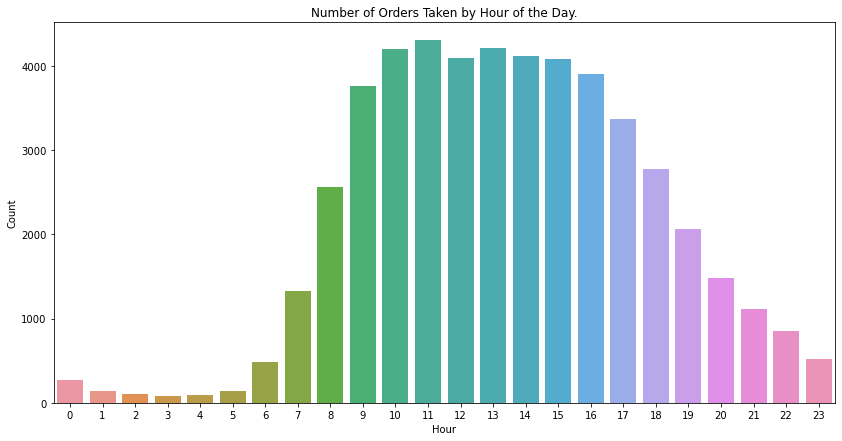

In [20]:
plt.figure(figsize = (14,7))
sns.countplot(x='order_hour_of_day', data= orders)
plt.title('Number of Orders Taken by Hour of the Day.')
plt.ylabel('Count')
plt.xlabel('Hour')

Text(0.5, 0, 'Day')

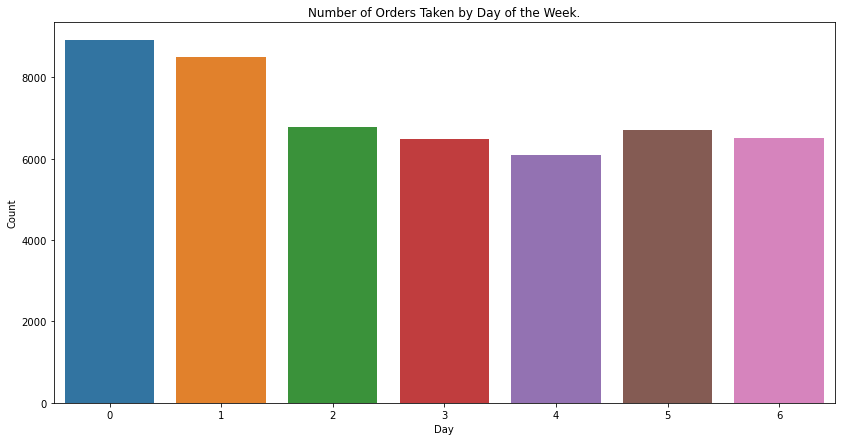

In [21]:
plt.figure(figsize = (14,7))
sns.countplot(x='order_dow', data= orders)
plt.title('Number of Orders Taken by Day of the Week.')
plt.ylabel('Count')
plt.xlabel('Day')

Text(0.5, 0, 'Days')

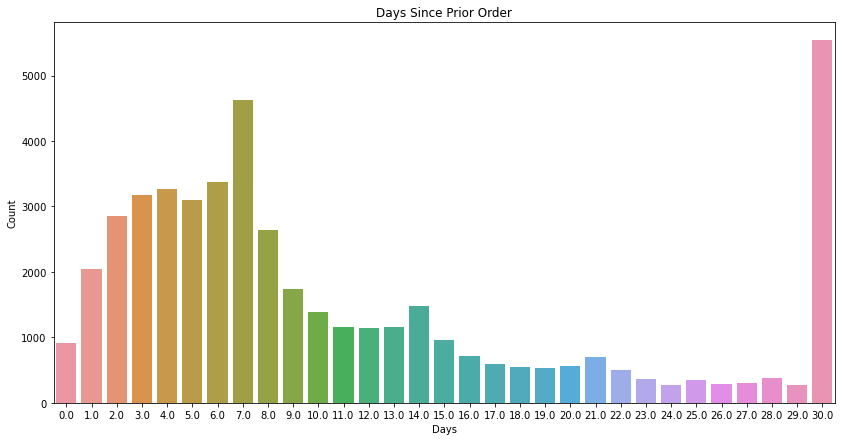

In [22]:
plt.figure(figsize = (14,7))
sns.countplot(x='days_since_prior_order', data= orders)
plt.title('Days Since Prior Order')
plt.ylabel('Count')
plt.xlabel('Days')

In [23]:
orders.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [24]:
orders.sort_values('order_id')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
6226,40,382,prior,29,1,15,23.0
15615,178,971,prior,2,3,11,19.0
8161,214,503,prior,5,0,16,9.0
17195,280,1059,prior,27,1,10,6.0
30445,377,1868,prior,65,1,13,2.0
...,...,...,...,...,...,...,...
48831,3420477,3014,prior,1,1,14,NaN
40127,3420523,2475,prior,1,4,18,NaN
7044,3420572,438,prior,6,1,15,5.0
41111,3420796,2534,prior,17,3,14,7.0


In [25]:
orders_test = orders[orders['eval_set']=='test']
orders_test

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0
...,...,...,...,...,...,...,...
49739,359439,3091,test,7,1,14,30.0
49747,2949998,3092,test,8,5,9,30.0
49900,1015484,3100,test,26,2,10,16.0
49927,2337872,3102,test,5,0,12,21.0


In [26]:
orders[orders['user_id']==3]


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,1374495,3,prior,1,1,14,NaN
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
32,1839752,3,prior,7,0,15,7.0
33,3225766,3,prior,8,0,17,7.0
34,3160850,3,prior,9,0,16,7.0
35,676467,3,prior,10,3,16,17.0


In [27]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [28]:
print(len(order_products_train)) 
print(order_products_train.order_id.min()) 
print(order_products_train.order_id.max())
print(order_products_train.order_id.nunique())

49999
1
123265
4774


In [29]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [30]:
print(len(order_products_prior)) 
print(order_products_prior.order_id.min()) 
print(order_products_prior.order_id.max())
print(order_products_prior.order_id.nunique())

49999
2
5281
4978


In [31]:
order_products_prior[order_products_prior.order_id == 2]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0


In [32]:
orders[orders.order_id == 29063]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [33]:
orders[orders.user_id == 2022]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
32809,89455,2022,prior,1,1,13,NaN
32810,256512,2022,prior,2,1,14,7.0
32811,1800883,2022,prior,3,1,11,7.0
32812,148437,2022,prior,4,1,13,7.0
32813,2475757,2022,prior,5,3,10,9.0
32814,3099210,2022,prior,6,0,15,4.0
32815,110115,2022,prior,7,0,11,7.0
32816,414020,2022,prior,8,6,16,13.0
32817,2366671,2022,prior,9,0,12,15.0
32818,178132,2022,prior,10,2,8,9.0


In [34]:
order_products_train[order_products_train.order_id == 878]

,order_id,product_id,add_to_cart_order,reordered
195,878,48070,1,1
196,878,24852,2,1
197,878,23044,3,0
198,878,45066,4,1
199,878,21903,5,1
200,878,24964,6,0
201,878,47209,7,1
202,878,40706,8,0
203,878,21616,9,0
204,878,10305,10,0


In [35]:
len(orders[orders.user_id == 2906103])

0

In [36]:
orders[orders.user_id == 2906103].order_dow.mode()


Series([], dtype: int64)

In [37]:
orders[orders.user_id == 202279].days_since_prior_order.mean()

nan

In [38]:
orders[orders.user_id == 202279].order_hour_of_day.mean()

nan

In [39]:
list(orders[orders.user_id == 202279]['order_id'].values)

[]

In [40]:
order_products_prior[order_products_prior['order_id'].isin(list(orders[orders.user_id == 10667]['order_id'].values))]

,order_id,product_id,add_to_cart_order,reordered


In [41]:
print(len(order_products_train))
print(len(order_products_prior))

49999
49999


In [42]:
len(order_products_train)+len(order_products_prior)

99998

In [43]:
merged_order_products = pd.merge(order_products_train, order_products_prior, how = 'outer')
merged_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [44]:
len(merged_order_products)

99998

In [45]:
products_per_order = merged_order_products.groupby('order_id').count()

Text(0.5, 0, 'Products')

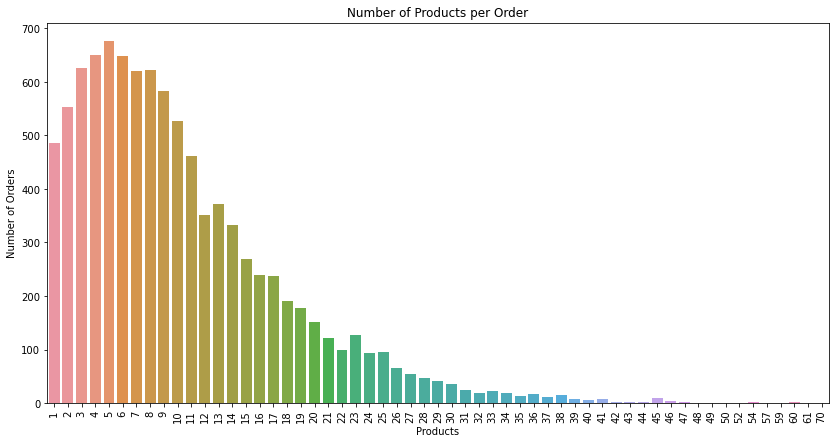

In [46]:
plt.figure(figsize = (14,7))
sns.countplot(x='product_id', data = products_per_order)
plt.title('Number of Products per Order')
plt.xticks(rotation=90)
plt.ylabel('Number of Orders')
plt.xlabel('Products')

In [47]:
order_products_desc = pd.merge(merged_order_products, products_desc, on = 'product_id')
order_products_desc.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,68474,11109,8,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
3,78197,11109,3,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
4,120619,11109,1,0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs


In [48]:
order_products_desc['product_name'].value_counts()

Banana                                  1403
Bag of Organic Bananas                  1174
Organic Strawberries                     828
Organic Baby Spinach                     690
Organic Hass Avocado                     585
                                        ... 
Creamer                                    1
Black Beans, Low Sodium                    1
Gourmet Oyster Mushrooms                   1
100% Carrot 100% Vegetable Juice           1
FreshBurst PocketPaks® Breath Strips       1
Name: product_name, Length: 16492, dtype: int64

Text(0.5, 0, 'Product Name')

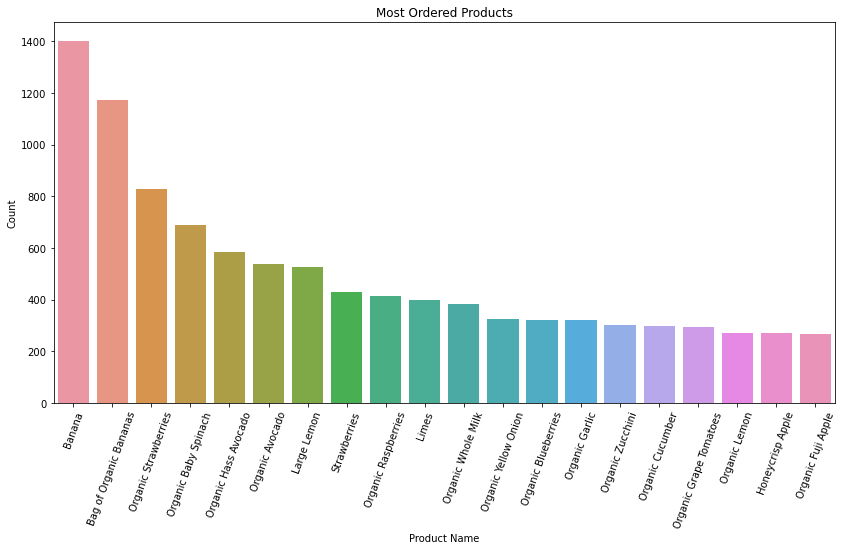

In [49]:
plt.figure(figsize = (14,7))
sns.countplot(x='product_name', data= order_products_desc, 
              order = order_products_desc.product_name.value_counts().index[:20])
plt.title('Most Ordered Products')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Product Name')

Text(0.5, 0, 'Department')

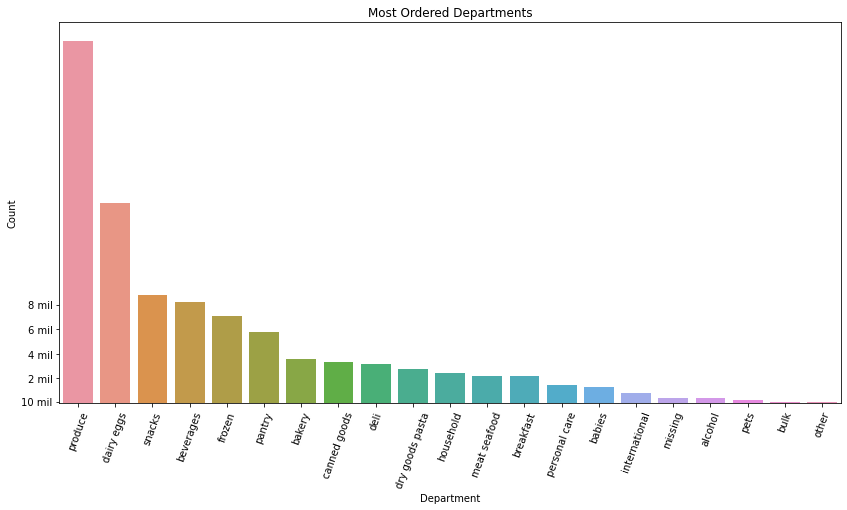

In [50]:
plt.figure(figsize = (14,7))
sns.countplot(x='department', data= order_products_desc, order = order_products_desc.department.value_counts().index)
plt.title('Most Ordered Departments')
plt.xticks(rotation=70)
plt.yticks([2000,4000,6000,8000,100],['2 mil','4 mil','6 mil','8 mil','10 mil'])
plt.ylabel('Count')
plt.xlabel('Department')

In [51]:
merged_orders = pd.merge(orders, order_products_desc, on = 'order_id')
merged_orders.head() 

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,62370,30,train,9,2,13,22.0,23288,1,1,Distilled Water,115,7,water seltzer sparkling water,beverages
1,39325,55,train,8,2,18,30.0,27509,11,0,Organic Seasoned Yukon Select Potatoes Hashed ...,129,1,frozen appetizers sides,frozen
2,39325,55,train,8,2,18,30.0,47766,2,1,Organic Avocado,24,4,fresh fruits,produce
3,39325,55,train,8,2,18,30.0,12481,13,0,Oreo Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
4,39325,55,train,8,2,18,30.0,46906,7,1,Grape White/Green Seedless,24,4,fresh fruits,produce


In [52]:
len(merged_orders)

1540

In [53]:
merged_orders[merged_orders['user_id']==55]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
1,39325,55,train,8,2,18,30.0,27509,11,0,Organic Seasoned Yukon Select Potatoes Hashed ...,129,1,frozen appetizers sides,frozen
2,39325,55,train,8,2,18,30.0,47766,2,1,Organic Avocado,24,4,fresh fruits,produce
3,39325,55,train,8,2,18,30.0,12481,13,0,Oreo Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
4,39325,55,train,8,2,18,30.0,46906,7,1,Grape White/Green Seedless,24,4,fresh fruits,produce
5,39325,55,train,8,2,18,30.0,7736,1,1,Premium Original Saltine Crackers,78,19,crackers,snacks
6,39325,55,train,8,2,18,30.0,48183,9,1,Flour Tortillas,128,3,tortillas flat bread,bakery
7,39325,55,train,8,2,18,30.0,4658,3,1,Imported Mineral Water,115,7,water seltzer sparkling water,beverages
8,39325,55,train,8,2,18,30.0,7413,4,1,Chocolate Peppermint Stick Bar,3,19,energy granola bars,snacks
9,39325,55,train,8,2,18,30.0,39491,5,1,Pirate's Booty Aged White Cheddar Baked Rice a...,107,19,chips pretzels,snacks
10,39325,55,train,8,2,18,30.0,18175,6,1,Organics Chocolate Milk with DHA,84,16,milk,dairy eggs


In [54]:
orders[orders['user_id']==3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,1374495,3,prior,1,1,14,NaN
27,444309,3,prior,2,3,19,9.0
28,3002854,3,prior,3,3,16,21.0
29,2037211,3,prior,4,2,18,20.0
30,2710558,3,prior,5,0,17,12.0
31,1972919,3,prior,6,0,16,7.0
32,1839752,3,prior,7,0,15,7.0
33,3225766,3,prior,8,0,17,7.0
34,3160850,3,prior,9,0,16,7.0
35,676467,3,prior,10,3,16,17.0


In [55]:
# Creating the test set of orders
test = orders[orders['eval_set']=='test']
test.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


In [56]:
# Now I can see everything a particular user has ordered, and how often
merged_orders[merged_orders['user_id']==55]['product_name'].value_counts()

Organic Seasoned Yukon Select Potatoes Hashed Browns           1
Organic Avocado                                                1
Oreo Chocolate Sandwich Cookies                                1
Grape White/Green Seedless                                     1
Premium Original Saltine Crackers                              1
Flour Tortillas                                                1
Imported Mineral Water                                         1
Chocolate Peppermint Stick Bar                                 1
Pirate's Booty Aged White Cheddar Baked Rice and Corn Puffs    1
Organics Chocolate Milk with DHA                               1
Sliced Varzi Salami Meat                                       1
Jumbo Brown Eggs                                               1
Breakfast Hot & Spicy Sausage Patties                          1
Name: product_name, dtype: int64

In [57]:
pickle.dump(merged_orders, open("Pickle/merged_orders.p", "wb"))

## Clustering

In [58]:
user_item = merged_orders[['user_id', 'product_id', 'reordered']]

In [59]:
user_item[user_item.duplicated(subset = ['user_id', 'product_id'], keep = 'first')]

,user_id,product_id,reordered
34,66,8143,1
162,382,33198,1
165,382,10070,1
166,382,42450,1
168,382,34866,1
439,787,9175,1
440,787,36107,1
442,787,45154,1


In [60]:
user_item[user_item['user_id']==55].product_id.value_counts()

27509    1
47766    1
12481    1
46906    1
7736     1
48183    1
4658     1
7413     1
39491    1
18175    1
39349    1
48890    1
2389     1
Name: product_id, dtype: int64